In [1]:
import numpy as np
import matplotlib.pyplot as plt
from quantify_core.data.handling import (
    default_datadir,
    get_latest_tuid,
    load_dataset,
    locate_experiment_container,
    set_datadir,
)

In [2]:
set_datadir(default_datadir())

Data will be saved in:
/home/pschaefers/quantify-data


In [3]:
tuid = get_latest_tuid(contains="transition")
dataset = load_dataset(tuid)
dataset

<xarray.Dataset> Size: 197kB
Dimensions:  (dim_0: 850)
Coordinates:
    x0       (dim_0) float64 7kB 7.062e+09 7.074e+09 ... 7.078e+09 7.077e+09
    x1       (dim_0) float64 7kB 0.03983 0.01243 0.005334 ... 0.03591 0.03639
    x2       (dim_0) float64 7kB 4e-08 1.2e-07 8e-08 ... 2.8e-07 2.76e-07
    x3       (dim_0) float64 7kB 7.796e+09 7.803e+09 ... 7.825e+09 7.826e+09
    x4       (dim_0) float64 7kB 0.03677 0.02922 0.01322 ... 0.07576 0.07034
    x5       (dim_0) float64 7kB 4e-08 5.6e-08 6e-08 ... 2.56e-07 2.52e-07
    x6       (dim_0) float64 7kB 7.579e+09 7.605e+09 ... 7.61e+09 7.607e+09
    x7       (dim_0) float64 7kB 0.03957 0.008903 0.06426 ... 0.05025 0.04689
    x8       (dim_0) float64 7kB 4e-08 8.4e-08 4e-08 ... 2.8e-07 2.84e-07
Dimensions without coordinates: dim_0
Data variables: (12/20)
    y0       (dim_0) float64 7kB -2.309 -2.695 -2.176 ... -16.13 -17.13 -17.31
    y1       (dim_0) float64 7kB -4.496 -4.78 -4.368 ... -16.19 -17.13 -17.28
    y2       (dim_0) float64 7kB 0.5579 0.6399 0.5395 ... 0.9296 0.9707 0.9681
    y3       (dim_0) float64 7kB 0.5579 0.6399 0.5395 ... 0.9296 0.9707 0.9681
    y4       (dim_0) float64 7kB nan nan nan nan nan nan ... nan nan nan nan nan
    y5       (dim_0) float64 7kB nan nan nan nan nan nan ... nan nan nan nan nan
    ...       ...
    y14      (dim_0) float64 7kB 0.5414 0.5856 0.5304 ... 0.9635 0.9402 0.9521
    y15      (dim_0) float64 7kB 0.5414 0.5856 0.5304 ... 0.9635 0.9402 0.9521
    y16      (dim_0) float64 7kB nan nan nan nan nan nan ... nan nan nan nan nan
    y17      (dim_0) float64 7kB nan nan nan nan nan nan ... nan nan nan nan nan
    y18      (dim_0) float64 7kB 0.5 0.5224 0.5 0.5222 ... 0.93 0.8971 0.8924
    y19      (dim_0) float64 7kB 0.5057 0.5 0.5018 ... 0.9098 0.8706 0.8978
Attributes:
    tuid:                             20250403-173728-162-139952
    name:                             CMAES_transition_matrix_['D8', 'D6', 'Z2']
    grid_2d:                          False
    grid_2d_uniformly_spaced:         False
    1d_2_settables_uniformly_spaced:  True
    elements:                         ['D8', 'D6', 'Z2']
    edges:                            []

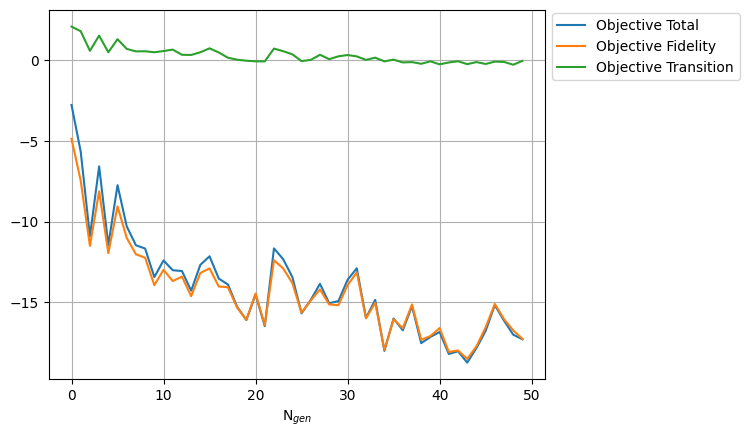

In [27]:
popsize = 16
Ngen = 50
total = int(len(dataset.x0))
mean_indices = np.arange(popsize, total, popsize + 1)

total_objective = dataset.y0.data[mean_indices]
objective_fidelity = dataset.y1.data[mean_indices]
objective_transition = total_objective-objective_fidelity 

plt.plot(range(Ngen), total_objective, label = "Objective Total")
plt.plot(range(Ngen), objective_fidelity, label = "Objective Fidelity")
plt.plot(range(Ngen), objective_transition, label = "Objective Transition")
plt.legend(bbox_to_anchor = (1.0,1.01))
plt.xlabel("N$_{gen}$")
plt.grid()
plt.show()



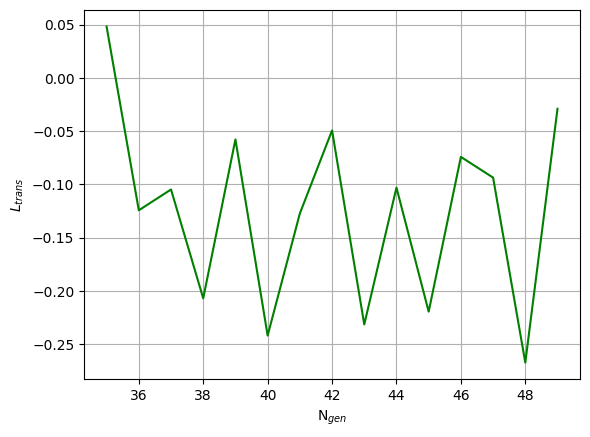

In [38]:
plt.plot(range(35,50),objective_transition[-15:],c="green")
plt.grid()
# plt.yscale("log") 
plt.xlabel("N$_{gen}$")
plt.ylabel("$L_{trans}$")
plt.show()